<a href="https://colab.research.google.com/github/Mwadz/EDA-/blob/main/Moringa_Data_Science_Statistics%26Visualisation_W2_Independent_Project_2022_03_Cynthia_Mwadime_python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Question**

Figure out how to predict which individuals are most likely to have or use a bank account.

# **Objectives**
1. Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
2. Find and deal with outliers, anomalies, and missing data within the dataset.
3. Perform univariate, bivariate and multivariate analysis recording your observations.
4. Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
5. Challenge your solution by providing insights on how you can make improvements.

# 1. Question definition
* The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. 
* The solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.



# a) Importing libraries

In [ ]:
# Importing Numpy
import numpy as np

# Importing Matplotlib
import matplotlib.pyplot as plt

# Importing Seaborn
import seaborn as sns

# b) Loading the dataset

In [ ]:
# importing pandas and reading csv file 
import pandas as pd
data = pd.read_csv('http://bit.ly/FinancialDataset') 

In [ ]:
# previewing dataset
data.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# previewing last 5 records of the dataset
data.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
data.shape

(23524, 13)

In [ ]:
data.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [ ]:
# loading the variable description dataset so we clarify what type of observation each column represents
description = pd.read_csv('http://bit.ly/VariableDefinitions') 
description.head()

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"


# The metric for success
* numerical and visual summarization of data has been performed.
* Exploratory data analysis principles have been applied to the data sets.

# Context
* Access to bank accounts has been regarded as an indicator of financial inclusion.
* Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to
* Across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.




## 2. Outliers

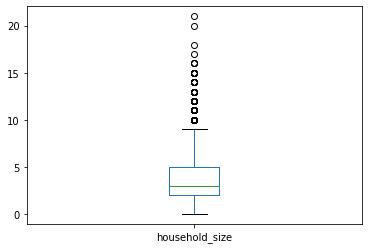

In [ ]:
# checking outliers in the household size variable  
data.boxplot(column =['household_size'], grid = False) 

hosehold sizes of 10-20 are rarest but appear in the dataset

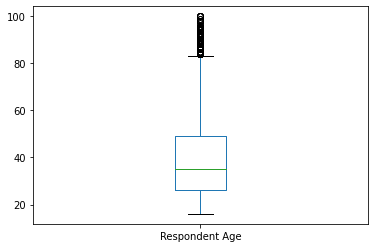

In [ ]:
# checking outliers in the age variable
data.boxplot(column =['Respondent Age'], grid = False) 

ages 80-100 are the outliers in this variable data


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


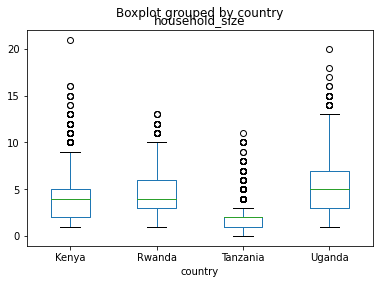

In [ ]:
# checking outliers in the household size variable per country
data.boxplot(column =['household_size'], by ='country', grid = False)

Tanzania has the smallest family sizes followed by Kenya, Rwanda then Uganda with the biggest respectively 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


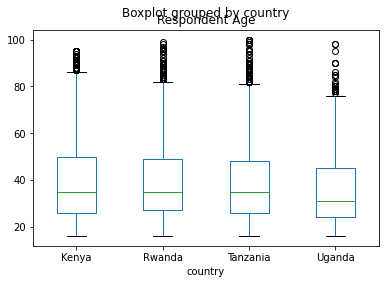

In [ ]:
# checking outliers in the age variable per country
data.boxplot(column =['Respondent Age'], by ='country', grid = False)

Age outliers are within the same range. These outliers are important. We can find out whether the older you get the more likey or unlikely you are to have a bank account


# Dealing with the outliers


In [ ]:
# #Calculating first, third quantiles and then later our IQR
# # ---
# Q1 = data.quantile(0.25)
# Q3 = data.quantile(0.75)
# IQR = Q3 - Q1

# # Removing outliers based on the IQR range and stores the result in the data frame 'df_out'
# # ---
# # 
# data_out = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# # Printing the shape of our new dataset
# # ---
# # 
# print(data_out.shape)

# # Printing the shape of our old dataset
# # ---
# #
# print(data.shape)

data_out = data

I pulled back on dropping the outliers since they're less likely to be erronious an can be useful in our analysis to find out whether the elderly are likey to ahve bank accounts

# Missing Data

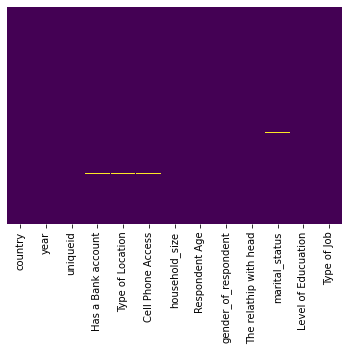

In [ ]:
sns.heatmap(data_out.isnull(),yticklabels=False,cbar=False, cmap="viridis")

The most missing values are in 4 columns that is 'Has a bank account', 'Type of Location', 'Cell Phone Access' and 'marital_status'

In [ ]:
# checking data types
data_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [ ]:
# Finding out the percentage of misssing vale in each column
percent_missing = data_out.isnull().sum() * 100 / len(data_out)
missing_value_df = pd.DataFrame({'column_name': data_out.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
country,country,0.059514
year,year,0.000000
uniqueid,uniqueid,0.000000
Has a Bank account,Has a Bank account,0.153035
Type of Location,Type of Location,0.063765
Cell Phone Access,Cell Phone Access,0.046761
household_size,household_size,0.119027
Respondent Age,Respondent Age,0.144533
gender_of_respondent,gender_of_respondent,0.144533
The relathip with head,The relathip with head,0.017004


In [ ]:
missing_value_df['percent_missing'].sum()

1.1350110525420845

this percentage is droppable

In [ ]:
# dropping the records with missing values
data_out1=data_out.dropna(axis=0).copy()

In [ ]:
# cheking the original dataset's shape
print(data_out.shape)
# checking dataset with no missing values' shape
print(data_out1.shape)

(23524, 13)
(23343, 13)


In [ ]:
# confirming change
percent_missing = data_out1.isnull().sum() * 100 / len(data_out1)
missing_value_df = pd.DataFrame({'column_name': data_out1.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
country,country,0.0
year,year,0.0
uniqueid,uniqueid,0.0
Has a Bank account,Has a Bank account,0.0
Type of Location,Type of Location,0.0
Cell Phone Access,Cell Phone Access,0.0
household_size,household_size,0.0
Respondent Age,Respondent Age,0.0
gender_of_respondent,gender_of_respondent,0.0
The relathip with head,The relathip with head,0.0


Now we have no missing values 

# Variable Identification
identifying which the predictor(input values) is and the target(output values)

In [ ]:
# predicting which individuals are more likely to have a bank account and 
# getting the variables that'll help make that prediction
y = targets = labels = output_var = data_out1["Has a Bank account"]
X = predictors = input_var = data_out1.loc[:,data_out1.columns != "Has a Bank account"]

In [ ]:
print('predictors list', list(X.columns))

predictors list ['country', 'year', 'uniqueid', 'Type of Location', 'Cell Phone Access', 'household_size', 'Respondent Age', 'gender_of_respondent', 'The relathip with head', 'marital_status', 'Level of Educuation', 'Type of Job']


In [ ]:
# creating containers for categorical and numerical columns
#
#first creating a dataset out of the
datatype = data_out1.dtypes
col = datatype[(datatype == 'object') | (datatype == 'int64')| (datatype == 'float64')].index.tolist()
num_col = datatype[(datatype == 'float64') | (datatype == 'int64')].index.tolist()
cat_col = datatype[(datatype == 'object')].index.tolist()
print("Categorical Columns :",cat_col)
print("Numerical Columns :",num_col)

Categorical Columns : ['country', 'uniqueid', 'Has a Bank account', 'Type of Location', 'Cell Phone Access', 'gender_of_respondent', 'The relathip with head', 'marital_status', 'Level of Educuation', 'Type of Job']
Numerical Columns : ['year', 'household_size', 'Respondent Age']


# 3. Univariate Analysis

Exploring variables one by one. Method to perform uni-variate analysis will depends on whether the variable type is categorical or continuous


# a) Continuous Variable Analysis

In [ ]:
# getting the summary statistics
data_out1.describe(include=['int64', 'float64'])

,year,household_size,Respondent Age
count,23343.000000,23343.000000,23343.000000
mean,2016.980594,3.688643,38.805509
std,0.901740,2.281184,16.519803
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [ ]:
# checking our target variable
data_out1["Has a Bank account"].value_counts()

No     20046
Yes     3297
Name: Has a Bank account, dtype: int64

In [ ]:
# Getting the percentages
# No--> has no bank account
# Yes--> has bank account
per_acc = (data_out1["Has a Bank account"].value_counts()/data_out1.shape[0]*100).round(2)
per_acc

No     85.88
Yes    14.12
Name: Has a Bank account, dtype: float64

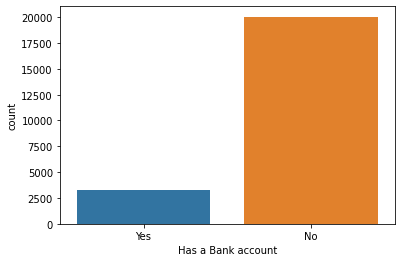

In [ ]:
# Visualizing the graph of people with bank accounts and those without
sns.countplot(data=data_out1 , x="Has a Bank account")

In [ ]:
data_out1.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [ ]:
# renaming the columns to suitable naming convections 
data_out1.columns = data_out1.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('.', '')
data_out1.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [ ]:
# Finding out categories within the locationtype and fammember variables
print(data_out1.type_of_location.unique())
print('____________________________________')
print(data_out1.the_relathip_with_head.unique())
print('____________________________________')
print(data_out1.marital_status.unique())
print('____________________________________')
print(data_out1.type_of_job.unique())
print('____________________________________')
print(data_out1.level_of_educuation.unique())


['Rural' 'Urban']
____________________________________
['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']
____________________________________
['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know']
____________________________________
['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally employed Government'
 'Farming and Fishing' 'Remittance Dependent' 'Other Income'
 'Dont Know/Refuse to answer' 'No Income']
____________________________________
['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA' '6']


In [ ]:
# let's determine the kurtoisis of the Respondent Age and household size
print('Kurtosis: ')
print(data_out1['respondent_age'].kurt())
print(data_out1['household_size'].kurt())
print('____________________________________________________')
print('Quatiles: ')
print(data_out1["respondent_age"].quantile([0.25,0.5,0.75]))
print(data_out1["household_size"].quantile([0.25,0.5,0.75]))
print('Skew')
print(data_out1["respondent_age"].skew())
print(data_out1["household_size"].skew())



Kurtosis: 
0.09844652254807196
1.1538690689335573
____________________________________________________
Quatiles: 
0.25    26.0
0.50    35.0
0.75    49.0
Name: respondent_age, dtype: float64
0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64
Skew
0.840661747532081
0.9741086837897069


both distributions are normal according to kurtosis analysis,age quatiles are 2,3 and 5 ie first second and third where the second quatile is the mean. It's 26, 35 and 48 for age. The distribution is also positively skewed. this means the distribution is skewed to the right. The tail on the curve’s right-hand side is longer than the tail on the left-hand side. From this we can dedice that the mean is greater than the mode in this situation.

# b) Categorical Variable Analysis
here we will use frequency distribution of each category.e.g Bar Chart, Pie Chart

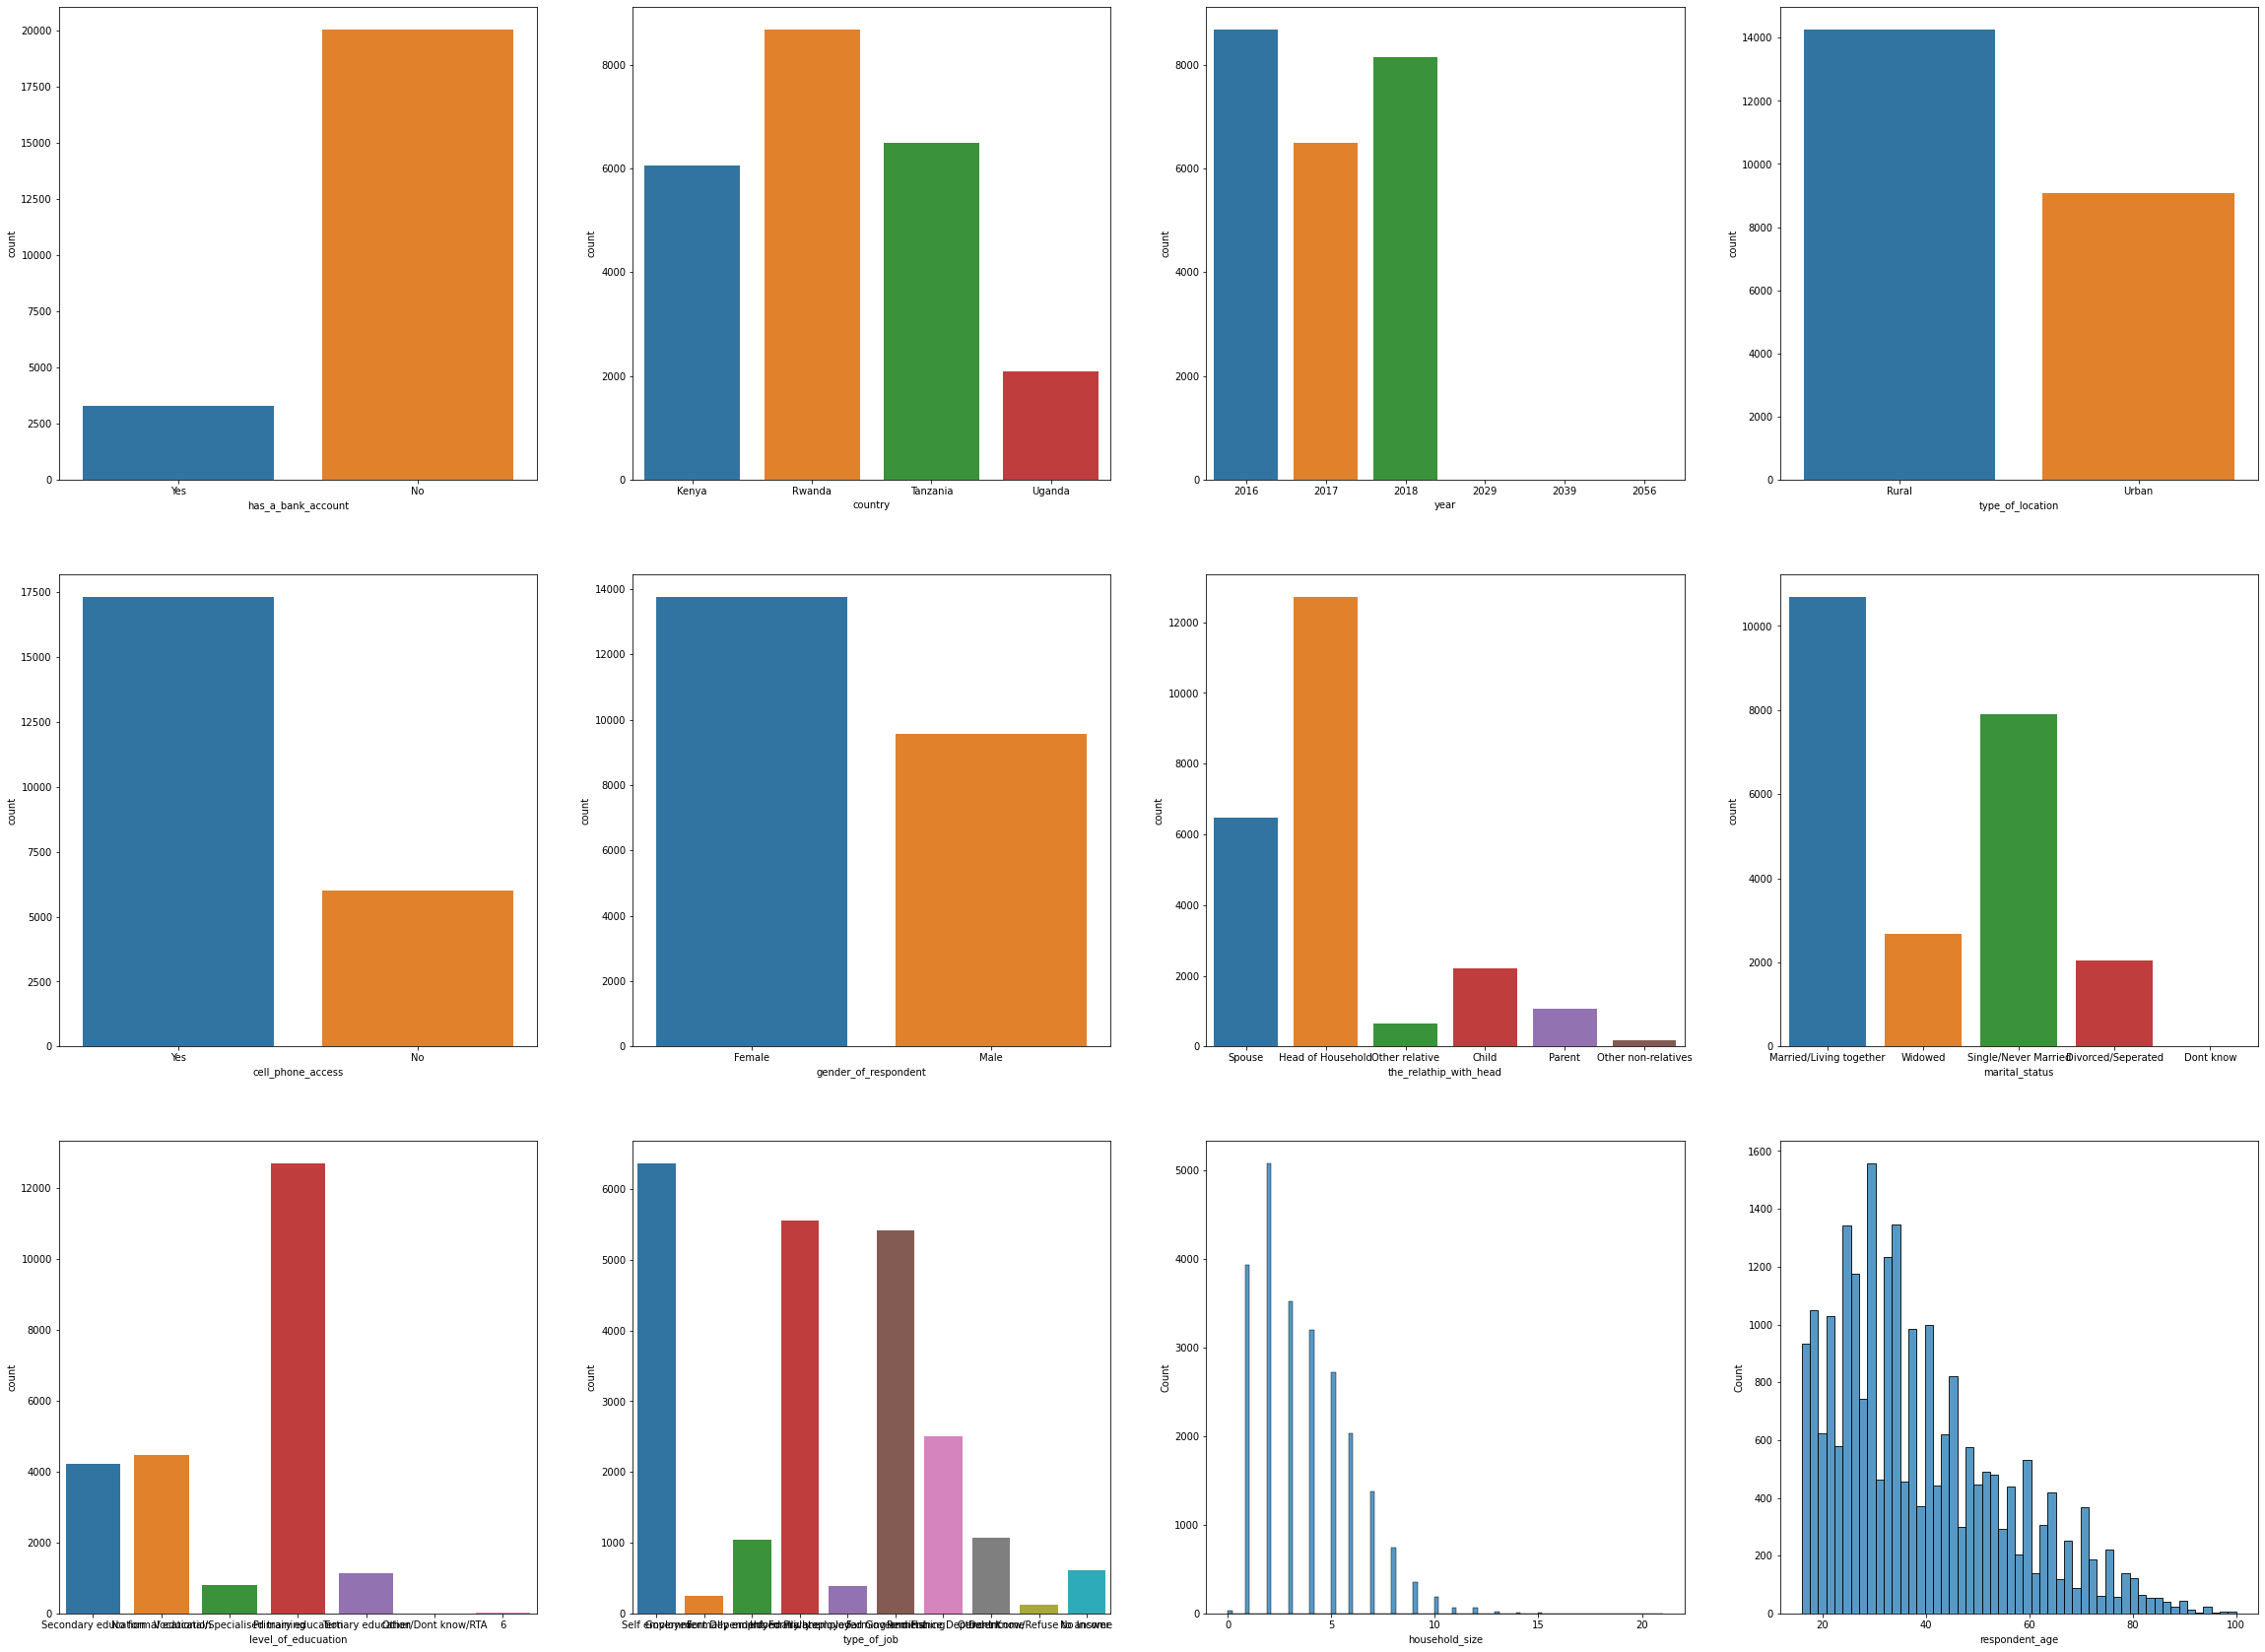

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # supress future warning
# Combined univariate analysis of each variables
fig,axes = plt.subplots(3,4, figsize=(40,30))
sns.countplot('has_a_bank_account',data=data_out1,ax=axes[0,0])
sns.countplot('country',data=data_out1,ax=axes[0,1])
sns.countplot('year',data=data_out1,ax=axes[0,2])
sns.countplot('type_of_location',data=data_out1,ax=axes[0,3])
sns.countplot('cell_phone_access',data=data_out1,ax=axes[1,0])
sns.countplot('gender_of_respondent',data=data_out1,ax=axes[1,1])
sns.countplot('the_relathip_with_head',data=data_out1,ax=axes[1,2])
sns.countplot('marital_status',data=data_out1,ax=axes[1,3])
sns.countplot('level_of_educuation',data=data_out1,ax=axes[2,0])
sns.countplot('type_of_job',data=data_out1,ax=axes[2,1])



#sns.distplot(df_train['Fare'], kde=True,ax=axes[1,2])
sns.histplot(data=data_out1,x="household_size",ax=axes[2,2])
sns.histplot(data=data_out1,x="respondent_age",ax=axes[2,3] )

Making the categories on the two tables more visible

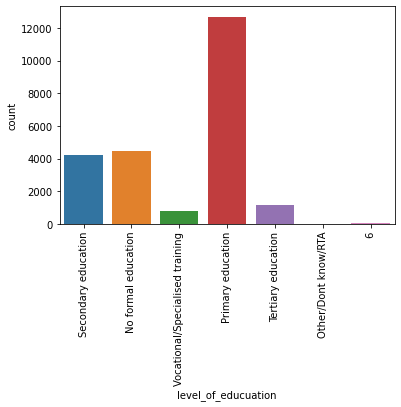

In [ ]:
# Education variable
g1 = sns.countplot(data=data_out1, x='level_of_educuation').tick_params(axis='x', rotation=90)


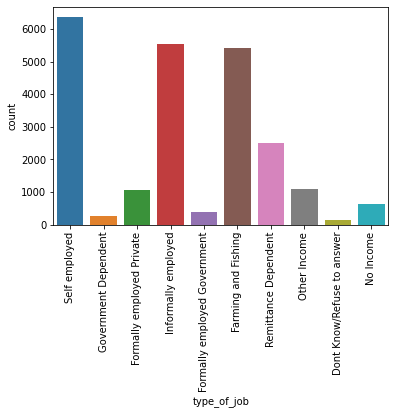

In [ ]:
# Job variable
g1 = sns.countplot(data=data_out1, x='type_of_job').tick_params(axis='x', rotation=90)

In [ ]:
data_out1['marital_status'].unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know'], dtype=object)

# Bivariate Analysis

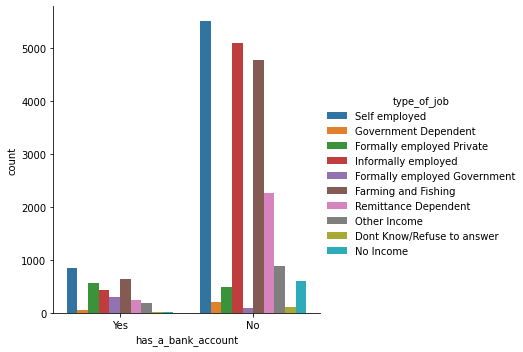

In [ ]:
# checking what type of job they do has to do with whether or not they have a bank account
sns.catplot(x='has_a_bank_account',hue="type_of_job",data=data_out1,kind = "count")

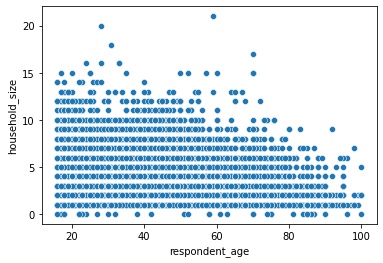

In [ ]:
# checking household size in correspondence with respondent's age
sns.scatterplot(x = data_out1["respondent_age"],y = data_out1["household_size"])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


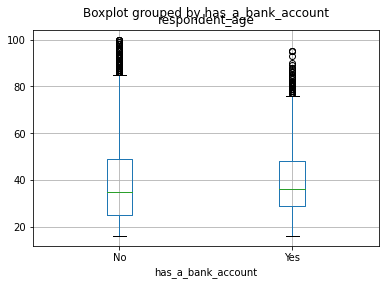

In [ ]:
# checking having bank account in correspondence with respondent's age
data_out1.boxplot(column="respondent_age",by="has_a_bank_account")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


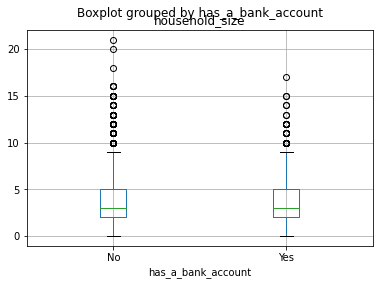

In [ ]:
data_out1.boxplot(column="household_size",by="has_a_bank_account")

In [ ]:
data_out1.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

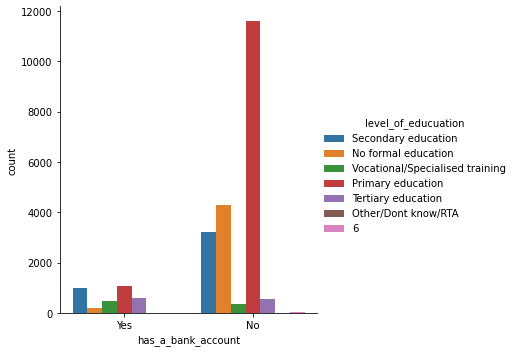

In [ ]:
sns.catplot(x='has_a_bank_account',hue="level_of_educuation",data=data_out1,kind = "count")

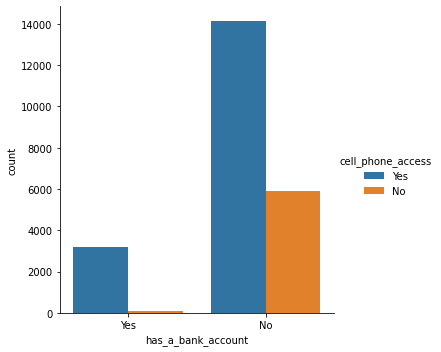

In [ ]:
sns.catplot(x='has_a_bank_account',hue="cell_phone_access",data=data_out1,kind = "count")


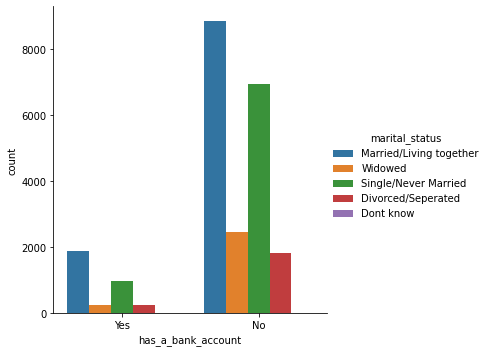

In [ ]:
sns.catplot(x='has_a_bank_account',hue="marital_status",data=data_out1,kind = "count")


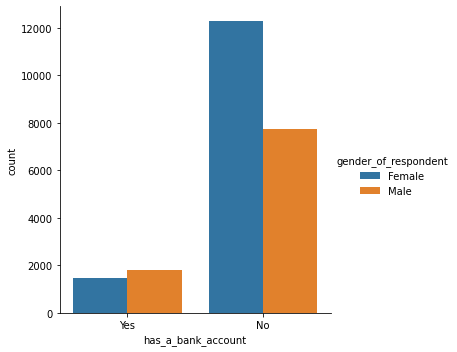

In [ ]:
sns.catplot(x='has_a_bank_account',hue="gender_of_respondent",data=data_out1,kind = "count")

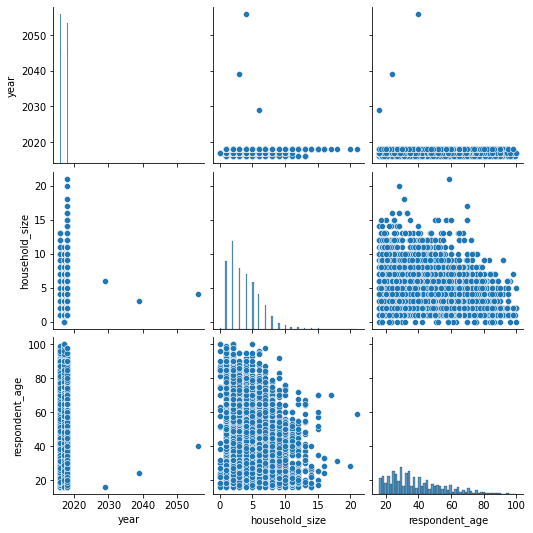

In [ ]:
# bivariate summary analysis
sns.pairplot(data_out1)



# Multivariate Analysis

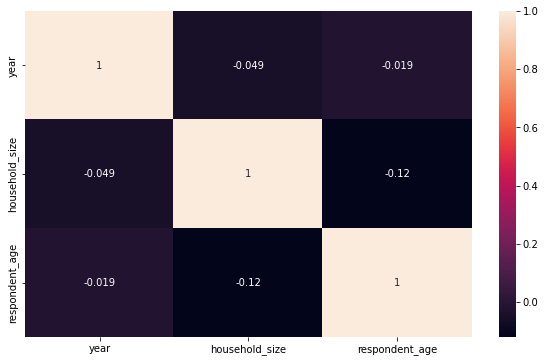

In [ ]:
# finding out correlation by plotting a correlation matrix
fig,ax = plt.subplots(figsize = (10,6))
corr = data_out1.corr()
sns.heatmap(corr,annot=True)

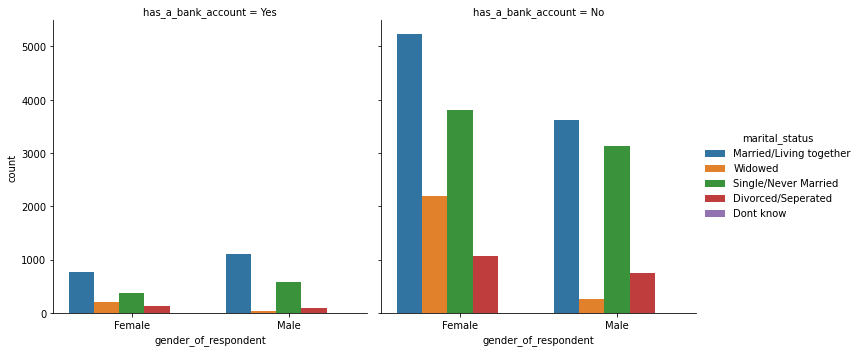

In [ ]:
sns.catplot(data=data_out1,col = "has_a_bank_account",x = "gender_of_respondent", hue="marital_status",kind = "count")


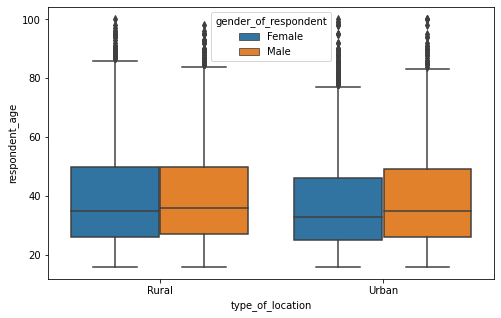

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,5))
testPlot = sns.boxplot(ax=ax1, x='type_of_location', y='respondent_age', hue='gender_of_respondent', data=data_out1)

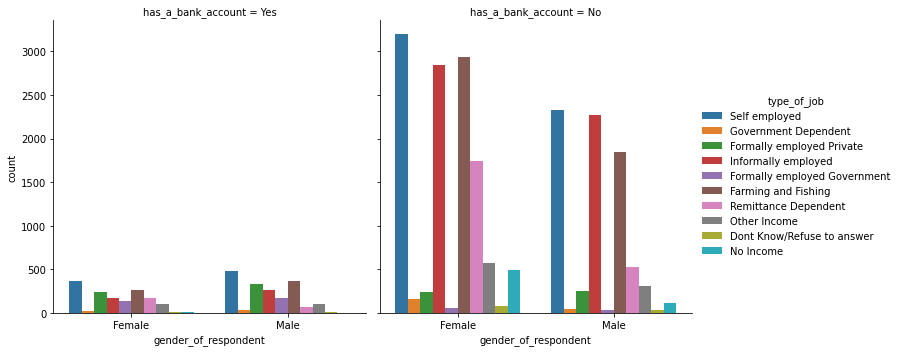

In [ ]:
sns.catplot(data=data_out1,col = "has_a_bank_account",x = "gender_of_respondent", hue="type_of_job",kind = "count")

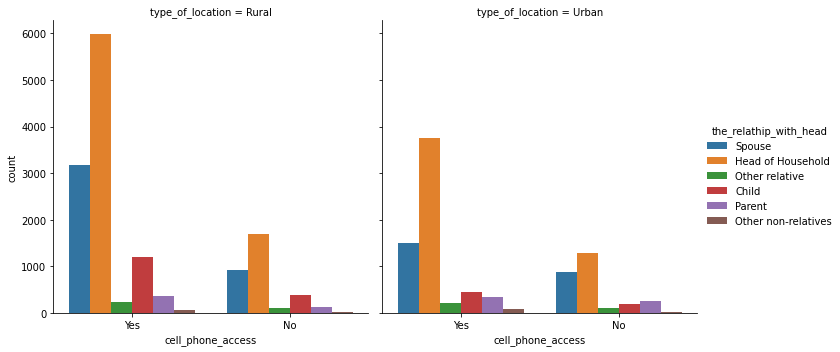

In [ ]:
sns.catplot(data=data_out1,col = "type_of_location",x = "cell_phone_access", hue="the_relathip_with_head",kind = "count")


In [ ]:
data_out1.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')